# Chapter 19: Are Shewhart's limits different?

For additional context see chapter 19 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get sales data

In [2]:
# Sales dataset url
sales_dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/17-sales-by-region-data.csv'

# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
sales_df = get_data(sales_dataset_url)

# Make 'Year' column dtype string
sales_df['Month'] = sales_df['Month'].astype('string')
sales_df.head()

,Month,East Region,West Region
0,Jan,10.7,6.9
1,Feb,13.0,11.3
2,Mar,11.4,9.3
3,Apr,11.5,9.8
4,May,12.5,18.7


### Split the dataframe by region

In [25]:
# Split dataframe two dataframes
df_east = sales_df[['Month', 'East Region']].copy()
df_west = sales_df[['Month', 'West Region']].copy()

# Rename the columns for clarity (optional)
df_east.columns = ['Month', 'Sales']
df_west.columns = ['Month', 'Sales']

# Calculate moving ranges for both regions
df_east['Moving Ranges'] = abs(df_east['Sales'].diff())
df_west['Moving Ranges'] = abs(df_west['Sales'].diff())

# Create list of dataframes
df_list = [df_east, df_west]
plot_label_names = ['East Region','West Region']

## Calculate limits

Here, the process limits are calculated two different ways. First, the limits are calculated using the formula **average +/- (2.660*average moving range)**. Second, the limits are calculated using the formula **average +/- (3*standard deviation)**. The resulting differences in process limits are made visually obvious in figures 19.1 and 19.2.

In [53]:
# Calculate the average of each region 
east_mean = round(df_east['Sales'].mean(),2)
west_mean = round(df_west['Sales'].mean(),2)

# Calculate global standard deviations
east_sigma = round(np.std(df_east['Sales']),2)
west_sigma = round(np.std(df_west['Sales']),2)

# Calculate the average moving ranges
east_AmR = round(df_east['Moving Ranges'].mean(),2)
west_AmR = round(df_west['Moving Ranges'].mean(),2)

print('East region standard deviation:',East_sigma) 
print('West region standard deviation:',West_sigma)

print('East region average mR:',east_AmR) 
print('West region average mR:',west_AmR)

East region standard deviation: 1.63
West region standard deviation: 2.74
East region average mR: 1.66
West region average mR: 2.91


In [68]:
# Specify C1
C1 = 2.660

# Calculate limits with Average +/- (2.660*average moving range)
east_UPL = round(east_mean + (C1*east_AmR),2)
east_LPL = round(east_mean - (C1*east_AmR),2)
# West region limits
west_UPL = round(west_mean + (C1*west_AmR),2)
west_LPL = round(west_mean - (C1*west_AmR),2)

# Calculate limits with Average +/- (3* standard deviation)
east_UPL_sigma = east_mean + (3*east_sigma)
east_LPL_sigma = east_mean - (3*east_sigma)
west_UPL_sigma = west_mean + (3*west_sigma)
west_LPL_sigma = west_mean - (3*west_sigma)

## Fig 19.1: East region comparison of limits

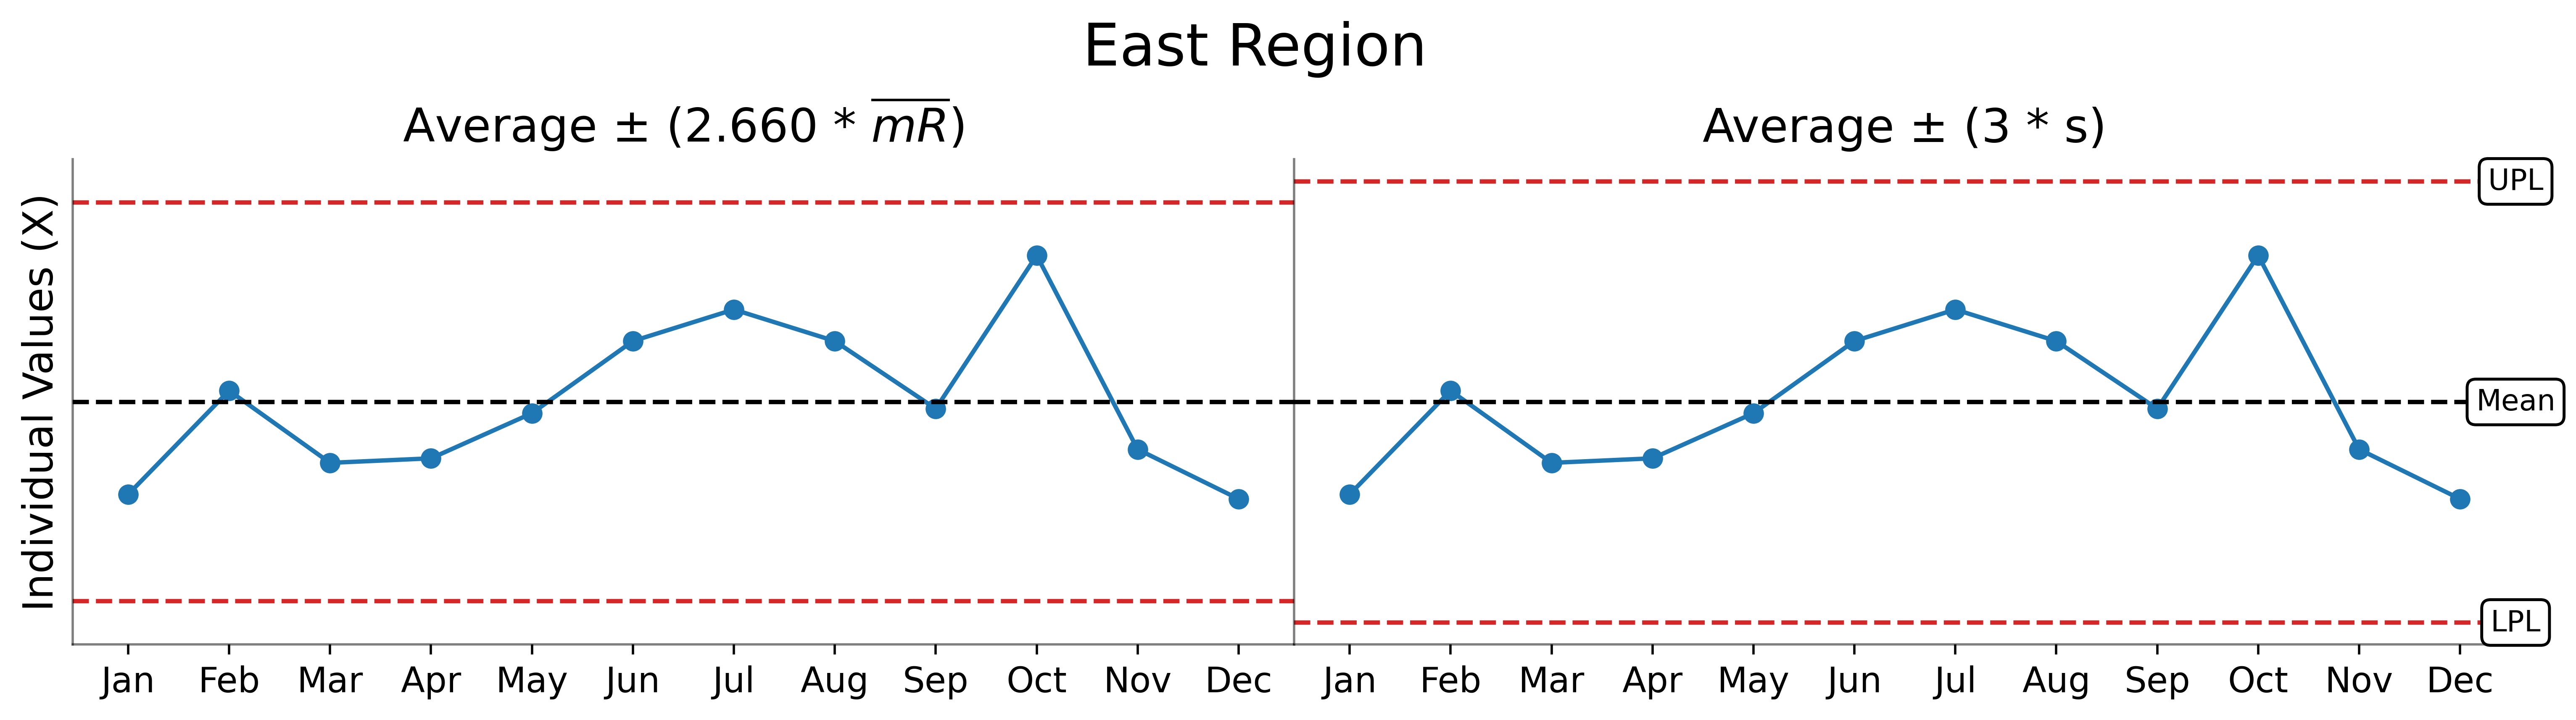

In [67]:
# Establish xtick labels
labels = df_east['Month']
# Specify column in df_east containing sales
east_data = df_east['Sales']

# Run this cell to generate the x-chart
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3), dpi=500)
fig.suptitle('East Region',fontsize=20, y=1.1)
# Remove white space between plots
plt.subplots_adjust(wspace=0)

# Plot data 
for ax in axs:
    ax.plot(labels, east_data, marker='o')
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=12)
    
# Define process limits for each subplot
limits = [
    (axs[0], [east_UPL, east_LPL, east_mean]),
    (axs[1], [east_UPL_sigma, east_LPL_sigma, east_mean])
]

# Colors for each limit line
colors = ['tab:red', 'tab:red', 'black']

# Add process limits dynamically
for ax, values in limits:
    for value, color in zip(values, colors):
        ax.axhline(value, ls='--', color=color)

# Set subplot titles
plot_titles = ['Average ± (2.660 * $\overline{mR}$)', 'Average ± (3 * s)']
for ax, title in zip(axs, plot_titles):
    ax.set_title(title, fontsize=16)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_alpha(0.5)
    ax.set_yticks([])

# Specify axis labels and title
axs[0].set_ylabel('Individual Values (X)',fontsize=14)
axs[0].set_yticklabels([])

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
axs[1].text(axs[1].get_xlim()[1], east_UPL_sigma, 'UPL', color='black', ha='center', va='center', bbox=bbox_props)
axs[1].text(axs[1].get_xlim()[1], east_LPL_sigma, 'LPL', color='black', ha='center', va='center', bbox=bbox_props)
axs[1].text(axs[1].get_xlim()[1], east_mean, 'Mean', color='black', ha='center', va='center', bbox=bbox_props)

# Show plot
plt.show()

## Fig 19.2: West region comparison of limits

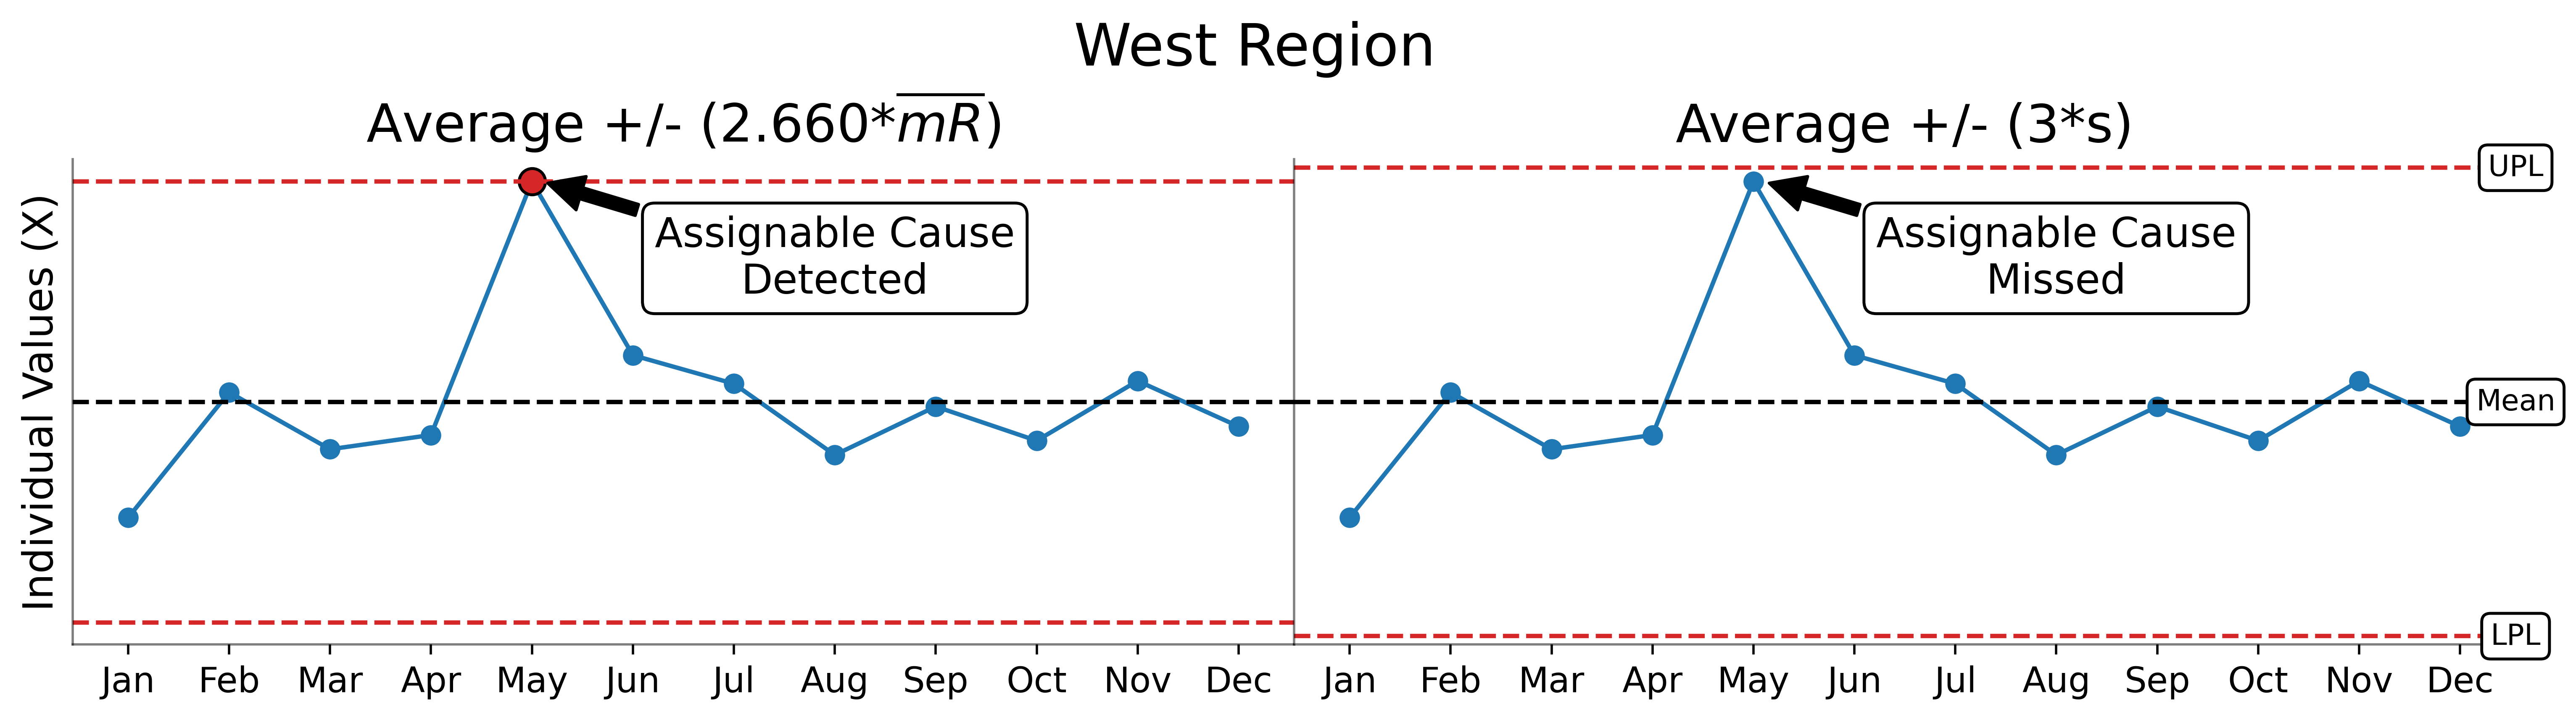

In [66]:
# Establish xtick labels
labels = df_west['Month']
# Specify column in df_east containing sales
west_data = df_west['Sales']

# Create masking parameters for values greater than and less than the 
# masking parmaters
upper_lim_1 = np.ma.masked_where(west_data < west_UPL, west_data)
lower_lim_1 = np.ma.masked_where(west_data > west_LPL, west_data)
upper_lim_2 = np.ma.masked_where(west_data < west_UPL_sigma, west_data)
lower_lim_2 = np.ma.masked_where(west_data > west_LPL_sigma, west_data)

# Run this cell to generate the x-chart
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3), dpi=500)
fig.suptitle('West Region',fontsize=20, y=1.1)
# Remove white space between plots
plt.subplots_adjust(wspace=0)

# Plot data 
for ax in axs:
    ax.plot(labels, west_data, marker='o')
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=12)

# Greater than Upper Process Limit values
axs[0].plot(labels, upper_lim_1, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)
axs[1].plot(labels, upper_lim_2, marker='o', ls='none', color='tab:red',
        markeredgecolor='black', markersize=9)

# Define process limits for each subplot
limits = [
    (axs[0], [west_UPL, west_LPL, west_mean]),
    (axs[1], [west_UPL_sigma, west_LPL_sigma, west_mean])
]

# Colors for each limit line
colors = ['tab:red', 'tab:red', 'black']

# Add process limits dynamically
for ax, values in limits:
    for value, color in zip(values, colors):
        ax.axhline(value, ls='--', color=color)

# Subplot titles
plot_titles = ['Average +/- (2.660*$\overline{mR}}$)','Average +/- (3*s)']
# Specify titles and spine visibility 
for ax, title,  in zip(axs, plot_titles):
    ax.set_title(title, fontsize=18)
    ax.spines[['top','right']].set_visible(False)
    ax.spines[['left','bottom']].set_alpha(0.5)
    ax.set_yticks([])

# Annotation parameters
annotations = [
    ('Assignable Cause\nDetected', axs[0], (4.1,18.7), (7,16)),
    ('Assignable Cause\nMissed', axs[1], (4.1,18.7), (7,16))
]

for text, ax, xy, xytext in annotations:
    ax.annotate(
        text,
        xy=xy,
        xytext=xytext,
        fontsize=14,
        ha='center',
        va='center',
        color='black',
        arrowprops=dict(facecolor='black', shrink=0.05),
        bbox=dict(facecolor='white', boxstyle='round', edgecolor='black')
    )

# Specify ylabel
axs[0].set_ylabel('Individual Values (X)',fontsize=14)

# Add text labels for limits and centerline
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
axs[1].text(axs[1].get_xlim()[1], west_UPL_sigma, 'UPL', color='black', ha='center', va='center', bbox=bbox_props)
axs[1].text(axs[1].get_xlim()[1], west_LPL_sigma, 'LPL', color='black', ha='center', va='center', bbox=bbox_props)
axs[1].text(axs[1].get_xlim()[1], west_mean, 'Mean', color='black', ha='center', va='center', bbox=bbox_props)

# Show plot
plt.show()